<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis9testing/Eyve_Geo_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# TODO - your code!
#load in and clean up data
heads=['party','handicapped-infants','water-project',
        'budget','physician-fee-freeze', 'el-salvador-aid',
        'religious-groups','anti-satellite-ban',
        'aid-to-contras','mx-missile','immigration',
        'synfuels', 'education', 'right-to-sue','crime','duty-free',
        'south-africa']
votes=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=heads)
votes=votes.replace({'?':np.NaN, 'y':1,'n':0})
votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [3]:
#break up into all the df's I'll need
dems=votes[votes['party']=='democrat'].reset_index(drop=True)
reps=votes[votes['party']=='republican'].reset_index(drop=True)
means=pd.DataFrame({'democrat': dems.mean(),'republican':reps.mean()})
means.head()

,democrat,republican
handicapped-infants,0.604651,0.187879
water-project,0.502092,0.506757
budget,0.888462,0.134146
physician-fee-freeze,0.054054,0.987879
el-salvador-aid,0.215686,0.951515


In [0]:
#get the confidence window of any issue/party combo.
def confidence(issue, partyDF, confidence=.95):
  party=partyDF['party'].loc[0]
  avg = means[party].loc[issue]
  std_dev=np.std(partyDF[issue], ddof=1)
  st_err=std_dev/(len(list(partyDF[issue])))
  margin=st_err * stats.t.ppf((1+confidence)/2, (len(list(partyDF[issue]))-1))
  return (avg, avg+margin, avg-margin)

In [5]:
confidence('budget',dems)

(0.8884615384615384, 0.8907874101626045, 0.8861356667604723)

In [6]:
dems['party'].loc[0]

'democrat'

In [0]:
import matplotlib.pyplot as plt


In [0]:
#returns the margin of error only for the graph
def margin(issue, partyDF, confidence=.95):
  party=partyDF['party'].loc[0]
  avg = means[party].loc[issue]
  std_dev=np.std(partyDF[issue], ddof=1)
  st_err=std_dev/(len(list(partyDF[issue])))
  margin=st_err * stats.t.ppf((1+confidence)/2, (len(list(partyDF[issue]))-1))
  return margin

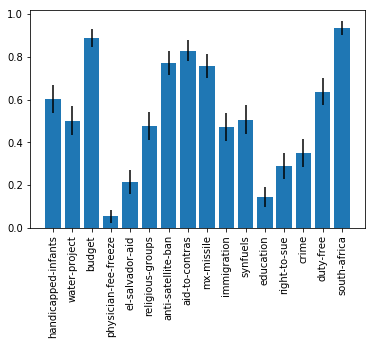

In [9]:
fig, ax = plt.subplots()
ax=plt.bar(means.index, means['democrat'], yerr=margin(means.index, dems))
plt.xticks(rotation='vertical');


The confidence interval shows where the average is going to land 95% of the time that the sample is taken (theoretically). The narrower a confidence interval the more clustered around the mean the data is, leading to a more distinct central trend. 

For my chi squared I'm going to use the data that I'm planning on using for my storytelling project because its all categorical and theres plenty of analysis to do. 

In [0]:
df=pd.read_csv('https://storage.googleapis.com/kaggle-datasets/1357/2447/facebook-fact-check.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566592203&Signature=l%2FHNQzV7Q5nxjPlrFxhKbXccBqN5%2Fv%2FnypxAffrNrAK%2FuP6mbeUD9CoAGMOE2wN8Qg1t6AVjHCwHZEPplN5Am2y51nWztPwD80weAF8%2B7W05HtPZk3nVxm63HSNstEbp7XwYlcmE%2BeDCEwhywNXOLqmG1M58KAHNmNSfq1rcBy7m7cNn2VM8YfGp7n74U7d5%2Fb1ILZxulOLoI0Shfd7m2ncRs44v8xmrj05GC71WCQqfLQcMrICYxVgW3VSNEkZC1aYTfar0ZrZxc%2BkX7gs93mTYEPTAPgWVRWl62vlLo6FCz0Ceh6wIclUCgDQ9ZjkJMS2G5nb4ghbvhCW2xbSxTQ%3D%3D')
df.isna().sum()
#I don't need Most of the data in this frame, rather than spending time cleaning I'll just 
# ditch all the columns that are potentially in my way
df=df.drop(['account_id', 'post_id','Post URL', 'Date Published', 'Debate', 'share_count', 'reaction_count', 'comment_count','Category', 'Post Type'], axis=1)

In [51]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [20]:
observed=pd.crosstab(df['Page'],df['Rating']).values
observed

array([[  2,   0, 172,  26],
       [ 25,   8,  96,  11],
       [  4,   0, 385,  20],
       [ 54,  30, 121,  81],
       [ 26,  26,  56,   4],
       [ 33,   9, 102,  65],
       [  2,   0, 528,   6],
       [ 89,  26, 142,  11],
       [ 10,   5,  67,  40]])

In [0]:
#get expected values
rowSums=observed.iloc[0:9,4].values
colSums=observed.iloc[9, 0:4].values
total=len(df)

In [19]:
expected = []
for row in rowSums:
  expectedRow=[]
  for col in colSums:
    expectVal= col*row/total
    expectedRow.append(expectVal)
  expected.append(expectedRow)

expected=np.array(expected)
expected

array([[ 21.47239264,   9.11481157, 146.2751972 ,  23.1375986 ],
       [ 15.03067485,   6.3803681 , 102.39263804,  16.19631902],
       [ 43.91104294,  18.63978966, 299.13277826,  47.31638913],
       [ 30.70552147,  13.03418054, 209.17353199,  33.08676599],
       [ 12.02453988,   5.10429448,  81.91411043,  12.95705521],
       [ 22.43865031,   9.52497809, 152.85758107,  24.17879053],
       [ 57.54601227,  24.427695  , 392.01752848,  62.00876424],
       [ 28.77300613,  12.2138475 , 196.00876424,  31.00438212],
       [ 13.09815951,   5.56003506,  89.22787029,  14.11393514]])

In [21]:
#calculate the chisquared using numpy
chi2= ((observed-expected)**2/expected).sum()
chi2

888.417630218737

In [24]:
# and now using scipy 
chiSqu, p, dof, expected = stats.chi2_contingency(observed)
print(chiSqu, p, dof, '\n',expected)

888.417630218737 4.127912840398355e-172 24 
 [[ 21.47239264   9.11481157 146.2751972   23.1375986 ]
 [ 15.03067485   6.3803681  102.39263804  16.19631902]
 [ 43.91104294  18.63978966 299.13277826  47.31638913]
 [ 30.70552147  13.03418054 209.17353199  33.08676599]
 [ 12.02453988   5.10429448  81.91411043  12.95705521]
 [ 22.43865031   9.52497809 152.85758107  24.17879053]
 [ 57.54601227  24.427695   392.01752848  62.00876424]
 [ 28.77300613  12.2138475  196.00876424  31.00438212]
 [ 13.09815951   5.56003506  89.22787029  14.11393514]]


Due to the high chi Squared and near-0 p value I reject the null hypothesis that the rating and source of the material are independent of one another. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)